In [68]:
## package imports ##
%load_ext autoreload
%autoreload 2
import sys
import pdkit
sys.path.append("../../src")
import utils.query_utils as query
import synapseclient as sc

syn = sc.login()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Welcome, aryton tediarjo!



INFO:synapseclient_default:Welcome, aryton tediarjo!



In [64]:
data = query.get_walking_synapse_table(syn, "syn12514611", "V2", healthCodes = ["1b0e06f4-caf7-44e2-b019-d6f8df6ac2c5"])

Querying V2 Data


In [170]:
def run_sim(data):
    dict_ = {}
    dict_["number_of_steps"] = []
    for filepath in data["walk_motion.json_pathfile"]:
        ts = query.open_filepath(filepath)
        ts = query.clean_accelerometer_data(ts)
        ts = ts[ts["sensorType"] == "userAcceleration"]
        ts = ts.loc["1970-01-01 00:00:05.000": "1970-01-01 00:00:28.000"]
        gp = pdkit.GaitProcessor(duration=ts.td[-1])
        ts = gp.resample_signal(ts)
        try:
            heel_strike_x = len(gp.heel_strikes(ts["x"])[0])
        except ValueError as v: 
            heel_strike_x = 0
        try:
            heel_strike_y = len(gp.heel_strikes(ts["y"])[0])
        except ValueError as v: 
            heel_strike_y = 0
        try:
            heel_strike_z = len(gp.heel_strikes(ts["z"])[0])
        except ValueError as v:
            heel_strike_z = 0

        number_of_steps = np.sqrt(heel_strike_x ** 2 + 
                                  heel_strike_y ** 2 +
                                  heel_strike_z ** 2)
        dict_["number_of_steps"].append(number_of_steps)
        return dict_

# Preprocessing step 1: 
## Time Window Cutoff
- Early calibration leads to underestimation of number of steps
- Consult with Megha when he is available

In [285]:
_ts = query.open_filepath(data["walk_motion.json_pathfile"].iloc[0])
_ts = query.clean_accelerometer_data(_ts)
_ts = _ts[_ts["sensorType"] == "userAcceleration"]

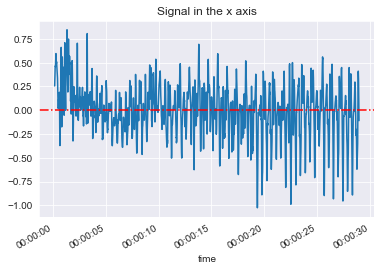

Frequency of Peaks:
416.31933134962776
Number of steps:
7


In [292]:
ts = _ts.loc["1970-01-01 00:00:00.000": "1970-01-01 00:00:28.000"]
ts["x"].plot()
plt.axhline(y=0.0, color='r', linestyle='-.')
plt.grid()
plt.title("Signal in the x axis")
plt.show()
print("Frequency of Peaks:")
print(gp.frequency_of_peaks(ts["z"]))
print("Number of steps:")
print(len(gp.heel_strikes(ts["x"])[0]))

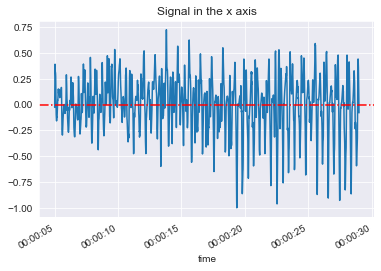

Frequency of Peaks:
606.837130582833
Number of steps:
22


In [315]:
ts = _ts.loc["1970-01-01 00:00:05.000": "1970-01-01 00:00:28.000"]
ts["x"].plot()
plt.axhline(y=0.0, color='r', linestyle='-.')
plt.grid()
plt.title("Signal in the x axis")
plt.show()
print("Frequency of Peaks:")
print(gp.frequency_of_peaks(ts["x"]))
print("Number of steps:")
print(len(gp.heel_strikes(ts["x"])[0]))

By looking at the graph we can observe that by subsetting the data to removing the first 5 seconds, we can see that the number of steps recorded on the x-orientation has been fixed of its deflation, due to misintepreting the normal line in the longitudinal data, frequency of peaks are also more granular as data has been normalized to the horizontal zero line, which made the frequency of peaks higher at the same time.

## Processing by Window chunks

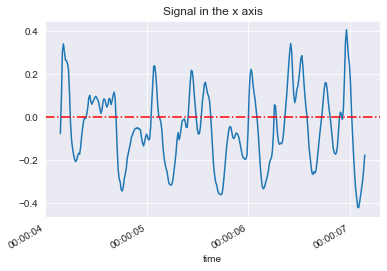

Frequency of Peaks:
186.0238943989533
Number of steps:
4


In [306]:
ts = _ts.loc["1970-01-01 00:00:05.000": "1970-01-01 00:00:07.000"]
ts["x"].plot()
plt.axhline(y=0.0, color='r', linestyle='-.')
plt.grid()
plt.title("Signal in the x axis")
plt.show()
print("Frequency of Peaks:")
print(gp.frequency_of_peaks(ts["x"]))
print("Number of steps:")
print(len(gp.heel_strikes(ts["x"])[0]))

In [336]:
from random import gauss

series = [gauss(0.0, 1.0) for i in range(2404)]
noise = pd.Series(series)

In [341]:
noise.index = ts.index
ts["white_noise"] = 0

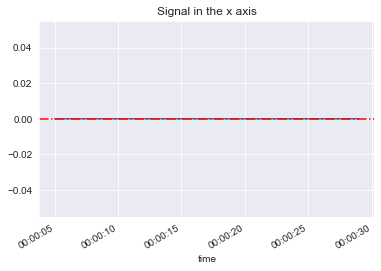

Frequency of Peaks:
Number of steps:


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('float64') to dtype('int64') with casting rule 'same_kind'

In [343]:
ts["white_noise"].plot()
plt.axhline(y=0.0, color='r', linestyle='-.')
plt.grid()
plt.title("Signal in the x axis")
plt.show()
print("Frequency of Peaks:")
# print(gp.frequency_of_peaks(ts["white_noise"]))
print("Number of steps:")
print(len(gp.heel_strikes(ts["white_noise"])[0]))

In [325]:
ts["white_noise"] = series

In [344]:
ts

,eventAccuracy,referenceCoordinate,sensorType,stepPath,timestamp,timestampDate,uptime,w,x,y,z,td,AA,white_noise
time,,,,,,,,,,,,,,
1970-01-01 00:00:05.002628125,NaN,NaN,userAcceleration,WalkAndBalance/walk/motion,184460.514307,NaN,881676.183418,NaN,-0.031743,0.462988,-0.393426,5.002628,0.617430,0
1970-01-01 00:00:05.012607125,NaN,NaN,userAcceleration,WalkAndBalance/walk/motion,184460.524286,NaN,881676.193397,NaN,0.129401,0.665728,-0.385672,5.012607,0.771078,0
1970-01-01 00:00:05.022586125,NaN,NaN,userAcceleration,WalkAndBalance/walk/motion,184460.534265,NaN,881676.203376,NaN,0.349294,0.505587,-0.159266,5.022586,0.595397,0
1970-01-01 00:00:05.032566125,NaN,NaN,userAcceleration,WalkAndBalance/walk/motion,184460.544245,NaN,881676.213356,NaN,0.385098,0.420752,0.036627,5.032566,0.522096,0
1970-01-01 00:00:05.042575125,NaN,NaN,userAcceleration,WalkAndBalance/walk/motion,184460.554254,NaN,881676.223365,NaN,0.346654,0.429494,0.204038,5.042575,0.546064,0
1970-01-01 00:00:05.052555125,NaN,NaN,userAcceleration,WalkAndBalance/walk/motion,184460.564234,NaN,881676.233345,NaN,0.309893,0.425723,0.285693,5.052555,0.562638,0
1970-01-01 00:00:05.062534124,NaN,NaN,userAcceleration,WalkAndBalance/walk/motion,184460.574213,NaN,881676.243324,NaN,0.306767,0.415883,0.315680,5.062534,0.569977,0
1970-01-01 00:00:05.072513125,NaN,NaN,userAcceleration,WalkAndBalance/walk/motion,184460.584192,NaN,881676.253303,NaN,0.294048,0.364735,0.278295,5.072513,0.507038,0
1970-01-01 00:00:05.082492125,NaN,NaN,userAcceleration,WalkAndBalance/walk/motion,184460.594171,NaN,881676.263282,NaN,0.265251,0.205026,0.253786,5.082492,0.376093,0
